# **Unsupervised Machine Learning in Python**

**Course Description**


Say you have a collection of customers with a variety of characteristics such as age, location, and financial history, and you wish to discover patterns and sort them into clusters. Or perhaps you have a set of texts, such as Wikipedia pages, and you wish to segment them into categories based on their content. This is the world of unsupervised learning






# **1  Clustering for Data set Explaoration**

In [ ]:

import pandas as pd
import numpy as np


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[2 0 0 2 2 0 2 1 2 1 0 0 0 0 2 0 1 1 0 1 1 1 2 0 0 1 1 1 2 0 2 0 2 2 2 0 1
 2 0 0 2 1 1 2 0 2 0 2 1 1 2 2 0 0 2 2 1 0 1 0 2 2 0 1 1 2 2 2 0 2 2 0 2 0
 1 2 0 1 0 0 2 1 0 2 1 1 2 2 0 2 0 0 2 1 0 0 1 1 2 2]


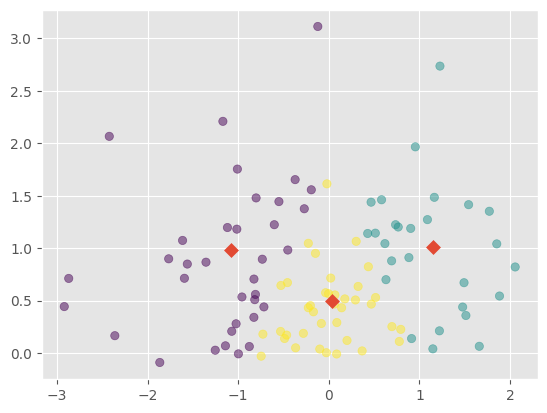

' Fantastic! The clustering looks great! But how can you be sure that 3\nclusters is the correct choice? In other words, how can you evaluate the quality\nof a clustering? Tune into the next video in which Ben will explain how to\nevaluate a clustering! '

In [ ]:
###
## Clustering 2D points
# Import KMeans
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


from scipy.stats import skewnorm

# Set seed for reproducibility
np.random.seed(42)


# Function to generate skew-normal distribution
def generate_skew_normal(size):
    a = 5  # skewness parameter
    return skewnorm.rvs(a, size=size)

# Generate 500 points for points_df
points_size = 500
points = pd.DataFrame({
    'X': np.random.normal(loc=0, scale=1, size=points_size),
    'Y': generate_skew_normal(size=points_size)
})

# Generate 100 points for new_points_df
new_points_size = 100
new_points = pd.DataFrame({
    'X': np.random.normal(loc=0, scale=1, size=new_points_size),
    'Y': generate_skew_normal(size=new_points_size)
})



# Create a KMeans instance with 3 clusters: model
model = KMeans(n_clusters = 3)

# Fit model to points
model.fit(points)

# Determine the cluster labels of new_points: labels
labels = model.predict(new_points)

# Print cluster labels of new_points
print(labels)

""" Great work! You've successfully performed k-Means clustering and predicted
the labels of new points. But it is not easy to inspect the clustering by just
looking at the printed labels. A visualization would be far more useful. In the
next exercise, you'll inspect your clustering with a scatter plot!  """




####
##
xs = new_points[['X']]
ys = new_points[['Y']]

# Make a scatter plot of xs and ys, using labels to define the colors
# Use the ggplot style
plt.style.use('ggplot')
plt.scatter(xs, ys, c=labels, alpha=0.5)

# Assign the cluster centers: centroids
centroids = model.cluster_centers_

# Assign the columns of centroids: centroids_x, centroids_y
centroids_x = centroids[:,0]
centroids_y = centroids[:,1]

# Make a scatter plot of centroids_x and centroids_y
plt.scatter( centroids_x, centroids_y, marker = 'D', s = 50  )
plt.show()


""" Fantastic! The clustering looks great! But how can you be sure that 3
clusters is the correct choice? In other words, how can you evaluate the quality
of a clustering? Tune into the next video in which Ben will explain how to
evaluate a clustering! """

In [ ]:
#matplotlib_inline.backend_inline.set_matplotlib_formats()
from google.colab import files
ile = files.upload()

fish = pd.read_csv('FishMeasurement.txt')
fish.info()
samples = fish.drop('Bream', axis = 1)

FileNotFoundError: ignored

In [ ]:
fish.tail()

,Bream,242.0,23.2,25.4,30.0,38.4,13.4
79,Pike,950.0,48.3,51.7,55.1,16.2,11.2
80,Pike,1250.0,52.0,56.0,59.7,17.9,11.7
81,Pike,1600.0,56.0,60.0,64.0,15.0,9.6
82,Pike,1550.0,56.0,60.0,64.0,15.0,9.6
83,Pike,1650.0,59.0,63.4,68.0,15.9,11.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   242.0   84 non-null     float64
 1   23.2    84 non-null     float64
 2   25.4    84 non-null     float64
 3   30.0    84 non-null     float64
 4   38.4    84 non-null     float64
 5   13.4    84 non-null     float64
dtypes: float64(6)
memory usage: 4.1 KB


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

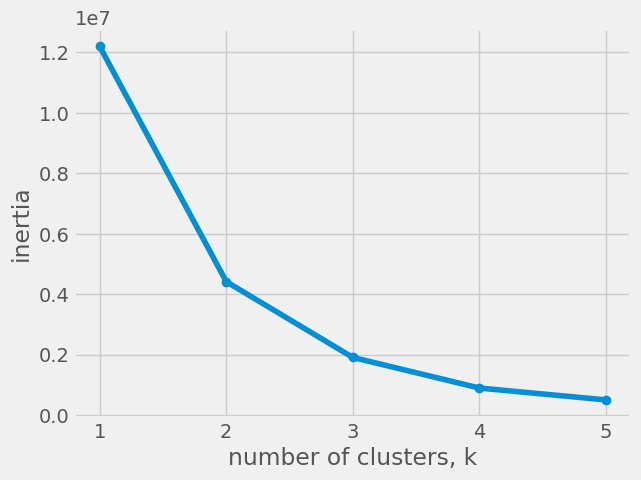

' Excellent job! The inertia decreases very slowly from 3 clusters to 4,\nso it looks like 3 clusters would be a good choice for this data. '

In [ ]:
#matplotlib_inline.backend_inline.set_matplotlib_formats()
#from google.colab import files



#samples = pd.read_csv('FishMeasurement.txt')
samples.info()



## How many clusters of grain?? Measurement
ks = range(1, 6)
inertias = []

for k in ks:
    # Create a KMeans instance with k clusters: model
    model  = KMeans(n_clusters = k)

    # Fit model to samples
    model.fit(samples)

    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)

## Plot ks vs inertias
# Use the fivethirtyeight style
plt.style.use('fivethirtyeight')
#
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

""" Excellent job! The inertia decreases very slowly from 3 clusters to 4,
so it looks like 3 clusters would be a good choice for this data. """




In [ ]:
## Evaluating the grain clustering
# Create a KMeans model with 3 clusters: model
model = KMeans(n_clusters = 3)

# Use fit_predict to fit model and obtain cluster labels: labels
labels = model.fit_predict(samples)

# Define the names
names = ["Kama", "Rosa", "Canadian"]

# Set a seed for reproducibility
np.random.seed(42)

# Generate a NumPy array with random selections from the names
length_of_samples = len(samples)  # Replace with your desired length
varieties = np.random.choice(names, size=length_of_samples)


# Add the 'varieties' column with the random varieties
#samples['varieties'] = random_varieties


# Create a DataFrame with labels and varieties as columns: df
df = pd.DataFrame({'labels': labels, 'varieties': varieties})

# Create crosstab: ct
ct = pd.crosstab( df['labels'], df['varieties'])

# Display ct
print(ct)

""" Great work! The cross-tabulation shows that the 3 varieties of grain
separate really well into 3 clusters. But depending on the type of data you are
working with, the clustering may not always be this good. Is there anything you
can do in such situations to improve your clustering? You'll find out in the next video!  """


varieties  Canadian  Kama  Rosa
labels                         
0                10     9    15
1                 5     3     4
2                13    10    15


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


" Great work! The cross-tabulation shows that the 3 varieties of grain\nseparate really well into 3 clusters. But depending on the type of data you are\nworking with, the clustering may not always be this good. Is there anything you\ncan do in such situations to improve your clustering? You'll find out in the next video!  "

In [ ]:
#matplotlib_inline.backend_inline.set_matplotlib_formats()
from google.colab import files
ile = files.upload()

fish = pd.read_csv('FishMeasurement.txt')
fish.info()
samples = fish.drop('Bream', axis = 1)
species = fish['Bream']




###
## Scaling fish data for clustering
# Perform the necessary imports
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Create scaler: scaler
scaler = StandardScaler()

# Create KMeans instance: kmeans
kmeans = KMeans(n_clusters = 4)

# Create pipeline: pipeline
pipeline = make_pipeline(scaler, kmeans)

""" Great work! Now that you've built the pipeline, you'll use it in the next
exercise to cluster the fish by their measurements. """




###
## Clustering the fish data
# Import pandas
import pandas as pd

# Fit the pipeline to samples
pipeline.fit(samples)

# Calculate the cluster labels: labels
labels = pipeline.predict(samples)

# Create a DataFrame with labels and species as columns: df
df = pd.DataFrame({'labels': labels, 'species': species})

# Create crosstab: ct
ct = pd.crosstab(df['labels'], df['species'])

# Display ct
print(ct)
""" Excellent! It looks like the fish data separates really well into
4 clusters! """

###






Saving FishMeasurement.txt to FishMeasurement (1).txt
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Bream   84 non-null     object 
 1   242.0   84 non-null     float64
 2   23.2    84 non-null     float64
 3   25.4    84 non-null     float64
 4   30.0    84 non-null     float64
 5   38.4    84 non-null     float64
 6   13.4    84 non-null     float64
dtypes: float64(6), object(1)
memory usage: 4.7+ KB
species  Bream  Pike  Roach  Smelt
labels                            
0            0    17      0      0
1            0     0     19      1
2           33     0      1      0
3            0     0      0     13


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


' Excellent! It looks like the fish data separates really well into\n4 clusters! '

In [ ]:
from google.colab import drive
#drive.mount('/content/drive')

from google.colab import files
ile = files.upload()
movements = pd.read_csv('CompanyStockPriceMovement.txt')
#prices = pd.read_csv('CompanyStockPriceMovement.txt')


Saving CompanyStockPriceMovement.txt to CompanyStockPriceMovement (5).txt


In [ ]:
movements
movement = movements.copy()

,Unnamed: 0,2010-01-04,2010-01-05,2010-01-06,2010-01-07,2010-01-08,2010-01-11,2010-01-12,2010-01-13,2010-01-14,...,2013-10-16,2013-10-17,2013-10-18,2013-10-21,2013-10-22,2013-10-23,2013-10-24,2013-10-25,2013-10-28,2013-10-29
0,Apple,0.580000,-0.220005,-3.409998,-1.170000,1.680011,-2.689994,-1.469994,2.779997,-0.680003,...,0.320008,4.519997,2.899987,9.590019,-6.540016,5.959976,6.910011,-5.359962,0.840019,-19.589981
1,AIG,-0.640002,-0.650000,-0.210001,-0.420000,0.710001,-0.200001,-1.130001,0.069999,-0.119999,...,0.919998,0.709999,0.119999,-0.480000,0.010002,-0.279998,-0.190003,-0.040001,-0.400002,0.660000
2,Amazon,-2.350006,1.260009,-2.350006,-2.009995,2.960006,-2.309997,-1.640007,1.209999,-1.790001,...,2.109985,3.699982,9.570008,-3.450013,4.820008,-4.079986,2.579986,4.790009,-1.760009,3.740021
3,American express,0.109997,0.000000,0.260002,0.720002,0.190003,-0.270001,0.750000,0.300004,0.639999,...,0.680001,2.290001,0.409996,-0.069999,0.100006,0.069999,0.130005,1.849999,0.040001,0.540001
4,Boeing,0.459999,1.770000,1.549999,2.690003,0.059997,-1.080002,0.360000,0.549999,0.530002,...,1.559997,2.480003,0.019997,-1.220001,0.480003,3.020004,-0.029999,1.940002,1.130005,0.309998
5,Bank of America,0.450000,0.460001,0.180000,0.250000,-0.199999,-0.060000,-0.359998,0.190001,0.190001,...,0.240000,0.210000,-0.050000,-0.010000,-0.030000,-0.240000,0.050000,0.110000,-0.060000,-0.110000
6,British American Tobacco,0.180000,0.220001,0.040001,0.250000,-0.360001,-0.099999,0.570000,-0.139999,0.260002,...,0.220001,2.250000,0.470001,0.320000,-0.040001,-0.430000,-0.019997,-0.129998,0.330002,1.150001
7,Canon,0.730000,0.369999,-0.099999,-0.169999,0.030003,0.110001,-0.079998,0.140000,0.389999,...,0.209999,0.560002,0.069999,0.119999,0.050003,-0.459999,0.259998,-0.109999,0.090001,-0.110001
8,Caterpillar,0.899997,0.700001,0.250000,0.369999,1.090000,3.179996,-0.769996,0.230004,-0.119998,...,0.209999,0.519996,1.029998,-0.020004,1.290001,-0.390000,1.209999,0.449997,-0.220001,0.159996
9,Colgate-Palmolive,0.360000,0.909996,-0.290001,-0.059998,1.300003,0.510003,1.050003,0.529999,-0.360001,...,0.949997,1.520001,-0.320000,-0.500000,1.080002,0.280002,0.620003,0.359996,1.070003,1.050003


In [ ]:
##
# Reset column headers to default indices
movement.columns = range(movement.shape[1])
movement.info()
# Extract the first column and save it as companies_name
companies = movement.iloc[:, 0]

# Delete the first column from the movement DataFrame
movement = movement.drop(movement.columns[0], axis=1)

#movement.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Columns: 964 entries, 0 to 963
dtypes: float64(963), object(1)
memory usage: 452.0+ KB


,Unnamed: 0,2010-01-04,2010-01-05,2010-01-06,2010-01-07,2010-01-08,2010-01-11,2010-01-12,2010-01-13,2010-01-14,...,2013-10-16,2013-10-17,2013-10-18,2013-10-21,2013-10-22,2013-10-23,2013-10-24,2013-10-25,2013-10-28,2013-10-29
0,Apple,0.580000,-0.220005,-3.409998,-1.170000,1.680011,-2.689994,-1.469994,2.779997,-0.680003,...,0.320008,4.519997,2.899987,9.590019,-6.540016,5.959976,6.910011,-5.359962,0.840019,-19.589981
1,AIG,-0.640002,-0.650000,-0.210001,-0.420000,0.710001,-0.200001,-1.130001,0.069999,-0.119999,...,0.919998,0.709999,0.119999,-0.480000,0.010002,-0.279998,-0.190003,-0.040001,-0.400002,0.660000
2,Amazon,-2.350006,1.260009,-2.350006,-2.009995,2.960006,-2.309997,-1.640007,1.209999,-1.790001,...,2.109985,3.699982,9.570008,-3.450013,4.820008,-4.079986,2.579986,4.790009,-1.760009,3.740021
3,American express,0.109997,0.000000,0.260002,0.720002,0.190003,-0.270001,0.750000,0.300004,0.639999,...,0.680001,2.290001,0.409996,-0.069999,0.100006,0.069999,0.130005,1.849999,0.040001,0.540001
4,Boeing,0.459999,1.770000,1.549999,2.690003,0.059997,-1.080002,0.360000,0.549999,0.530002,...,1.559997,2.480003,0.019997,-1.220001,0.480003,3.020004,-0.029999,1.940002,1.130005,0.309998
5,Bank of America,0.450000,0.460001,0.180000,0.250000,-0.199999,-0.060000,-0.359998,0.190001,0.190001,...,0.240000,0.210000,-0.050000,-0.010000,-0.030000,-0.240000,0.050000,0.110000,-0.060000,-0.110000
6,British American Tobacco,0.180000,0.220001,0.040001,0.250000,-0.360001,-0.099999,0.570000,-0.139999,0.260002,...,0.220001,2.250000,0.470001,0.320000,-0.040001,-0.430000,-0.019997,-0.129998,0.330002,1.150001
7,Canon,0.730000,0.369999,-0.099999,-0.169999,0.030003,0.110001,-0.079998,0.140000,0.389999,...,0.209999,0.560002,0.069999,0.119999,0.050003,-0.459999,0.259998,-0.109999,0.090001,-0.110001
8,Caterpillar,0.899997,0.700001,0.250000,0.369999,1.090000,3.179996,-0.769996,0.230004,-0.119998,...,0.209999,0.519996,1.029998,-0.020004,1.290001,-0.390000,1.209999,0.449997,-0.220001,0.159996
9,Colgate-Palmolive,0.360000,0.909996,-0.290001,-0.059998,1.300003,0.510003,1.050003,0.529999,-0.360001,...,0.949997,1.520001,-0.320000,-0.500000,1.080002,0.280002,0.620003,0.359996,1.070003,1.050003


In [ ]:

movement.head()
movement

,1,2,3,4,5,6,7,8,9,10,...,954,955,956,957,958,959,960,961,962,963
0,0.580000,-0.220005,-3.409998,-1.170000,1.680011,-2.689994,-1.469994,2.779997,-0.680003,-4.999995,...,0.320008,4.519997,2.899987,9.590019,-6.540016,5.959976,6.910011,-5.359962,0.840019,-19.589981
1,-0.640002,-0.650000,-0.210001,-0.420000,0.710001,-0.200001,-1.130001,0.069999,-0.119999,-0.500000,...,0.919998,0.709999,0.119999,-0.480000,0.010002,-0.279998,-0.190003,-0.040001,-0.400002,0.660000
2,-2.350006,1.260009,-2.350006,-2.009995,2.960006,-2.309997,-1.640007,1.209999,-1.790001,-2.039994,...,2.109985,3.699982,9.570008,-3.450013,4.820008,-4.079986,2.579986,4.790009,-1.760009,3.740021
3,0.109997,0.000000,0.260002,0.720002,0.190003,-0.270001,0.750000,0.300004,0.639999,-0.130001,...,0.680001,2.290001,0.409996,-0.069999,0.100006,0.069999,0.130005,1.849999,0.040001,0.540001
4,0.459999,1.770000,1.549999,2.690003,0.059997,-1.080002,0.360000,0.549999,0.530002,-0.709999,...,1.559997,2.480003,0.019997,-1.220001,0.480003,3.020004,-0.029999,1.940002,1.130005,0.309998
5,0.450000,0.460001,0.180000,0.250000,-0.199999,-0.060000,-0.359998,0.190001,0.190001,-0.379999,...,0.240000,0.210000,-0.050000,-0.010000,-0.030000,-0.240000,0.050000,0.110000,-0.060000,-0.110000
6,0.180000,0.220001,0.040001,0.250000,-0.360001,-0.099999,0.570000,-0.139999,0.260002,-0.150002,...,0.220001,2.250000,0.470001,0.320000,-0.040001,-0.430000,-0.019997,-0.129998,0.330002,1.150001
7,0.730000,0.369999,-0.099999,-0.169999,0.030003,0.110001,-0.079998,0.140000,0.389999,-0.130001,...,0.209999,0.560002,0.069999,0.119999,0.050003,-0.459999,0.259998,-0.109999,0.090001,-0.110001
8,0.899997,0.700001,0.250000,0.369999,1.090000,3.179996,-0.769996,0.230004,-0.119998,-1.330002,...,0.209999,0.519996,1.029998,-0.020004,1.290001,-0.390000,1.209999,0.449997,-0.220001,0.159996
9,0.360000,0.909996,-0.290001,-0.059998,1.300003,0.510003,1.050003,0.529999,-0.360001,-0.540001,...,0.949997,1.520001,-0.320000,-0.500000,1.080002,0.280002,0.620003,0.359996,1.070003,1.050003


In [ ]:
## Clustering stocks using KMeans
""" In this exercise, you'll cluster companies using their daily stock price
movements (i.e. the dollar difference between the closing and opening prices
for each trading day). You are given a NumPy array movements of daily price
movements from 2010 to 2015 (obtained from Yahoo! Finance), where each row
corresponds to a company, and each column corresponds to a trading day. """


# Import Normalizer
from sklearn.preprocessing import  Normalizer

# Create a normalizer: normalizer
normalizer = Normalizer()

# Create a KMeans model with 10 clusters: kmeans
kmeans = KMeans(n_clusters = 10)

# Make a pipeline chaining normalizer and kmeans: pipeline
pipeline = make_pipeline(normalizer, kmeans)

# Fit pipeline to the daily price movements
movements = movements.drop('Unnamed: 0', axis = 1)
pipeline.fit(movements)


""" Great work - you're really getting the hang of this. Now that your pipeline
has been set up, you can find out which stocks move together in the next exercise!  """





###
## Which stocks move together?
# Import pandas
import pandas as pd


# Predict the cluster labels: labels
labels_c = pipeline.predict(movements)


# Create a DataFrame aligning labels and companies: df
df = pd.DataFrame({'labels': labels_c, 'companies': companies})

# Display df sorted by cluster label
print(df.sort_values('labels'))

""" Fantastic job - you have completed Chapter 1! Take a look at the clusters.
 Are you surprised by any of the results? In the next chapter, you'll
 learn about how to communicate results such as this through visualizations. """







/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


    labels                           companies
0        0                               Apple
52       0                            Unilever
50       0  Taiwan Semiconductor Manufacturing
19       0                     GlaxoSmithKline
46       0                      Sanofi-Aventis
43       0                                 SAP
17       0                     Google/Alphabet
37       0                            Novartis
33       0                           Microsoft
20       1                          Home Depot
58       1                               Xerox
30       1                          MasterCard
31       1                           McDonalds
32       1                                  3M
11       1                               Cisco
24       1                               Intel
35       1                            Navistar
8        1                         Caterpillar
47       1                            Symantec
51       1                   Texas instruments
13       1   

" Fantastic job - you have completed Chapter 1! Take a look at the clusters.\n Are you surprised by any of the results? In the next chapter, you'll\n learn about how to communicate results such as this through visualizations. "

# **2  Visualization with Hierarchical Clustering and t-SNE**

Well done! With 5 data samples, there would be 4 merge operations, and with 6 data samples, there would be 5 merges, and so on.

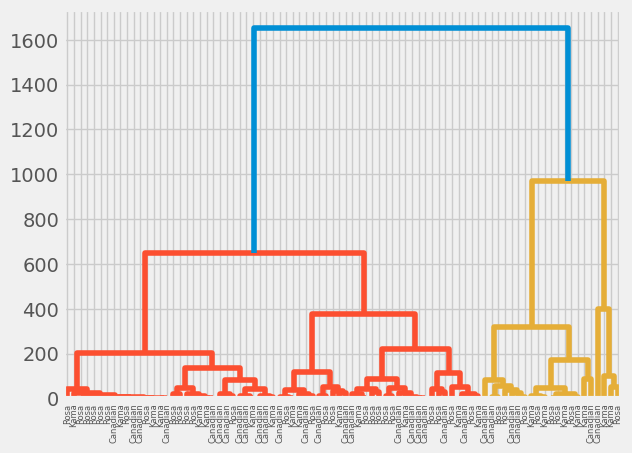

' Superb! Dendrograms are a great way to illustrate the arrangement of the \nclusters produced by hierarchical clustering.  '

In [ ]:
## Hierarchical clustering of the grain data
# Perform the necessary imports
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

# Calculate the linkage: mergings
mergings = linkage(samples, method = 'complete' )

# Plot the dendrogram, using varieties as labels
dendrogram( mergings ,
           labels= varieties ,
           leaf_rotation= 90,
           leaf_font_size=6,
)
plt.show()

""" Superb! Dendrograms are a great way to illustrate the arrangement of the
clusters produced by hierarchical clustering.  """



In [ ]:
## Hierarchies of stocks
# Import normalize
from sklearn.preprocessing import normalize

# Normalize the movements: normalized_movements
#normalized_movements = normalize(movement)

# Calculate the linkage: mergings
#mergings = linkage(normalized_movements, method = 'complete' )

# Plot the dendrogram
dendrogram( mergings ,
          labels= companies ,
           leaf_rotation= 90,
           leaf_font_size=6,
)
plt.show()

""" Great work! You can produce great visualizations such as this with hierarchical
clustering, but it can be used for more than just visualizations.
You'll find out more about this in the next video!  """


KeyError: ignored

Which clusters are closest?
In the video, you learned that the linkage method defines how the distance between clusters is measured. In complete linkage, the distance between clusters is the distance between the furthest points of the clusters. In single linkage, the distance between clusters is the distance between the closest points of the clusters.

In [ ]:
## Different linkage, different hierarchical clustering!
# Perform the necessary imports
# This was using the countries data: EuroVision.
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram

# Calculate the linkage: mergings
mergings = linkage(samples, method='single')

# Plot the dendrogram
dendrogram(mergings,
           labels=country_names,
           leaf_rotation=90,
           leaf_font_size=6
)
plt.show()

""" Great work! As you can see, performing single linkage hierarchical
clustering produces a different dendrogram!  """


NameError: ignored

Extracting the cluster labels
In the previous exercise, you saw that the intermediate clustering of the grain samples at height 6 has 3 clusters. Now, use the fcluster() function to extract the cluster labels for this intermediate clustering, and compare the labels with the grain varieties using a cross-tabulation.

In [ ]:
## Extracting cluster labels
# Perform the necessary imports
import pandas as pd
from scipy.cluster.hierarchy import fcluster

# Use fcluster to extract labels: labels
labels = fcluster(mergings, 6, criterion='distance')

# Create a DataFrame with labels and varieties as columns: df
df = pd.DataFrame({'labels': labels, 'varieties': varieties})

# Create crosstab: ct
ct = pd.crosstab(df['labels'], df['varieties'])

# Display ct
print(ct)

""" Fantastic - you've now mastered the fundamentals of k-Means and agglomerative
hierarchical clustering. Next, you'll learn about t-SNE, which is a powerful
tool for visualizing high dimensional data.


Task: Extract clusterlabels from stock data """



Task: Extract cluster labels from stock data
Basically repeat previous 3 task with stock data!


In [ ]:
companies
labels_c

array([7, 3, 2, 1, 9, 3, 4, 6, 4, 5, 4, 8, 4, 4, 2, 6, 3, 7, 3, 4, 1, 6,
       6, 4, 8, 5, 3, 5, 5, 9, 1, 5, 4, 8, 6, 4, 9, 4, 5, 4, 5, 5, 4, 4,
       4, 6, 4, 2, 6, 4, 8, 8, 4, 0, 9, 3, 5, 4, 6, 2], dtype=int32)


In the video, you saw t-SNE applied to the iris dataset. In this exercise, you'll apply t-SNE to the grain samples data and inspect the resulting t-SNE features using a scatter plot. You are given an array samples of grain samples and a list variety_numbers giving the variety number of each grain sample.  """


In [ ]:
#files.upload()
upload = files.upload()
df = pd.read_csv('seeds.csv', header=None)

samples = df[list(range(7))].values
variety_numbers = list(df[7])

Saving seeds.csv to seeds (1).csv


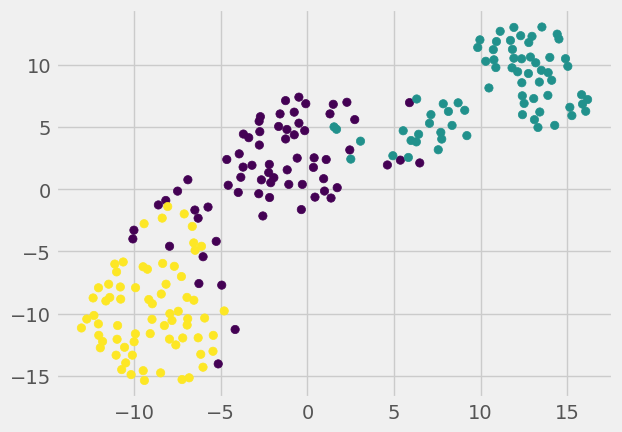

" Excellent! As you can see, the t-SNE visualization manages to separate the \n3 varieties of grain samples. But how will it perform on the stock data? You'll find out in the next exercise! "

In [ ]:
## t-SNE visualization of grain dataset
# Import TSNE
from sklearn.manifold import TSNE

# Create a TSNE instance: model
# Typically 50 - 200
model = TSNE(learning_rate=200)

# Apply fit_transform to samples: tsne_features
tsne_features = model.fit_transform(samples)

# Select the 0th feature: xs
xs = tsne_features[:,0]

# Select the 1st feature: ys
ys = tsne_features[:,1]

# Scatter plot, coloring by variety_numbers
plt.scatter(xs, ys, c=variety_numbers)
plt.show()

""" Excellent! As you can see, the t-SNE visualization manages to separate the
3 varieties of grain samples. But how will it perform on the stock data? You'll find out in the next exercise! """


In [ ]:


# Import normalize
from sklearn.preprocessing import normalize


# Normalize the movements: normalized_movements
normalized_movements
#movement.info()
#companies


array([[ 0.00302051, -0.00114574, -0.01775851, ..., -0.02791349,
         0.00437463, -0.10202026],
       [-0.02599391, -0.02639998, -0.00852927, ..., -0.00162466,
        -0.01624623,  0.02680614],
       [-0.02208986,  0.01184398, -0.02208986, ...,  0.04502568,
        -0.01654394,  0.03515588],
       ...,
       [ 0.01981027,  0.01059598,  0.02626006, ..., -0.01197837,
         0.01842816,  0.02211388],
       [ 0.0200991 ,  0.00223323, -0.01786587, ..., -0.0066997 ,
         0.00446647, -0.0066997 ],
       [ 0.01796837,  0.00112314,  0.        , ..., -0.00673829,
         0.02919855,  0.01123007]])

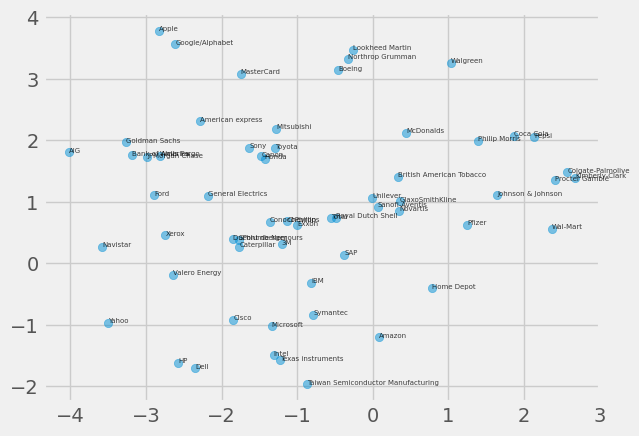

" Fantastic! It's visualizations such as this that make t-SNE such a powerful\n tool for extracting quick insights from high dimensional data.  "

In [ ]:



## A t-SNE map of the stock market
# Import TSNE
from sklearn.manifold import TSNE

# Create a TSNE instance: model
model = TSNE(learning_rate = 50)

# Apply fit_transform to normalized_movements: tsne_features
tsne_features = model.fit_transform(normalized_movements)

# Select the 0th feature: xs
xs = tsne_features[:,0]

# Select the 1th feature: ys
ys = tsne_features[:,1]

# Scatter plot
# Scatter plot
plt.scatter(xs, ys, alpha=0.5)

# Annotate the points
for x, y, company in zip(xs, ys, companies):
    plt.annotate(company, (x, y), fontsize=5, alpha=0.75)
plt.show()

""" Fantastic! It's visualizations such as this that make t-SNE such a powerful
 tool for extracting quick insights from high dimensional data.


 It was a success!! """





# **3 Decorrelating Data and Dimension Reduction PCA**


Recall that the principal components are the directions along which the the data varies.

In [ ]:
#files.upload()
upload = files.upload()
df = pd.read_csv('seeds-width-vs-length.csv', header=None)



Saving seeds-width-vs-length.csv to seeds-width-vs-length.csv


In [ ]:
grains = df.values

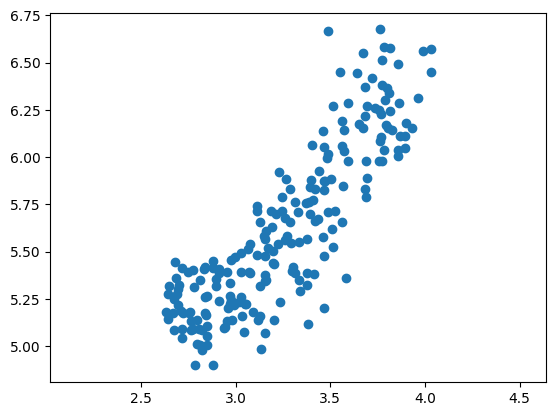

0.8604149377143469


' Great work! As you would expect, the width and length of the grain samples are highly correlated.\nRecall that the principal components are the directions along which the the data varies.\n\nData seem to have high variance northeast, and slightly more variance southeast.\n'

In [ ]:
## Correlated data in nature
# Perform the necessary imports
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

# Assign the 0th column of grains: width
width = grains [:,0]

# Assign the 1st column of grains: length
length = grains [:,1]

# Scatter plot width vs length
plt.scatter(width, length)
plt.axis('equal')
plt.show()

# Calculate the Pearson correlation
correlation, pvalue = pearsonr(width, length)

# Display the correlation
print(correlation)

""" Great work! As you would expect, the width and length of the grain samples are highly correlated.
Recall that the principal components are the directions along which the the data varies.

Data seem to have high variance northeast, and slightly more variance southeast.
"""


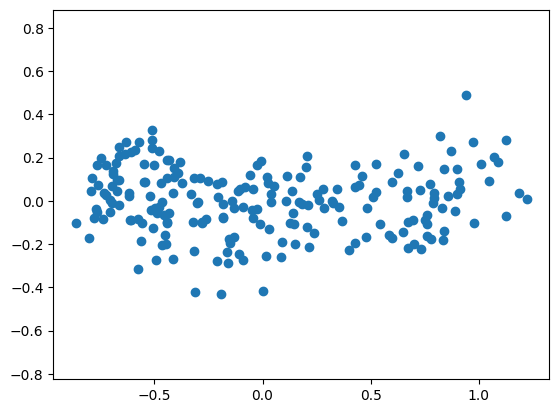

8.933825901280557e-17
0.0


" Excellent! You've successfully decorrelated the grain measurements with PCA!  "

In [ ]:
## Decorrelating the grain measurements with PCA
# Import PCA
from sklearn.decomposition import PCA

# Create PCA instance: model
model = PCA()

# Apply the fit_transform method of model to grains: pca_features
pca_features = model.fit_transform(grains)

# Assign 0th column of pca_features: xs
xs = pca_features[:,0]

# Assign 1st column of pca_features: ys
ys = pca_features[:,1]

# Scatter plot xs vs ys
plt.scatter(xs, ys)
plt.axis('equal')
plt.show()

# Calculate the Pearson correlation of xs and ys
correlation, pvalue = pearsonr(xs, ys)

# Display the correlation
print(correlation)
print(np.round(correlation, 6))

""" Excellent! You've successfully decorrelated the grain measurements with PCA!  """

Next Verse

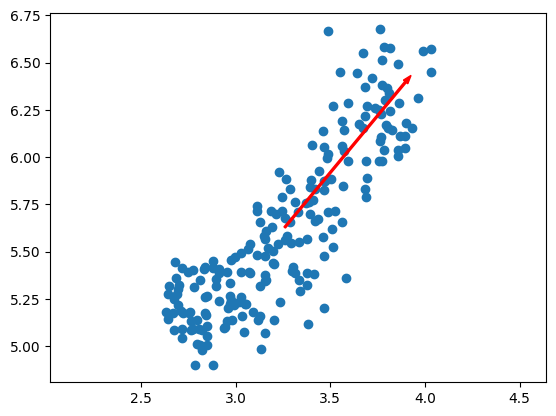

' Excellent job! This is the direction in which the grain data varies the most. '

In [ ]:
## The first principal component
# Make a scatter plot of the untransformed points
plt.scatter(grains[:,0], grains[:,1])

# Create a PCA instance: model
model = PCA()

# Fit model to points
model.fit(grains)

# Get the mean of the grain samples: mean
mean = model.mean_

# Get the first principal component: first_pc
first_pc = model.components_[0,:]

# Plot first_pc as an arrow, starting at mean
plt.arrow(mean[0], mean[1], first_pc[0], first_pc[1], color='red', width=0.01)

# Keep axes on same scale
plt.axis('equal')
plt.show()

""" Excellent job! This is the direction in which the grain data varies the most. """

Variance of the PCA features
The fish dataset is 6-dimensional. But what is its intrinsic dimension? Make a plot of the variances of the PCA features to find out. As before, samples is a 2D array, where each row represents a fish. You'll need to standardize the features first.

In [ ]:
ile = files.upload()

fish = pd.read_csv('FishMeasurement.txt')
fish.info()
samples = fish.drop('Bream', axis = 1)
species = fish['Bream']

Saving FishMeasurement.txt to FishMeasurement.txt
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Bream   84 non-null     object 
 1   242.0   84 non-null     float64
 2   23.2    84 non-null     float64
 3   25.4    84 non-null     float64
 4   30.0    84 non-null     float64
 5   38.4    84 non-null     float64
 6   13.4    84 non-null     float64
dtypes: float64(6), object(1)
memory usage: 4.7+ KB


In [ ]:
#samples.values

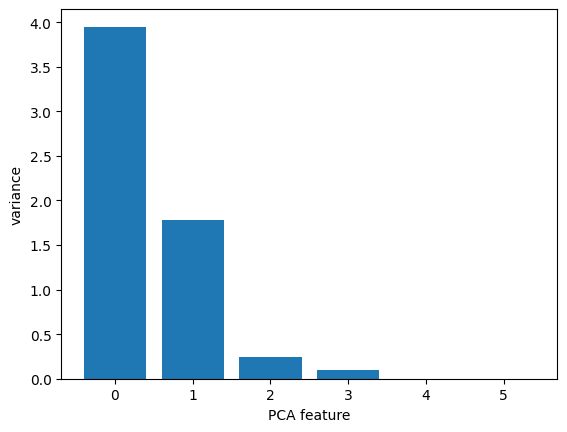

' Great work! It looks like PCA features 0 and 1 have significant variance  '

In [ ]:
## Variance of pca features
# Perform the necessary imports
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt

# Create scaler: scaler
scaler = StandardScaler()

# Create a PCA instance: pca
pca = PCA()

# Create pipeline: pipeline
pipeline = make_pipeline(scaler, pca)

# Fit the pipeline to 'samples'
pipeline.fit(samples)

# Plot the explained variances
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_.tolist())
plt.xlabel('PCA feature')
plt.ylabel('variance')
plt.xticks(features)
plt.show()


""" Great work! It looks like PCA features 0 and 1 have significant variance  """


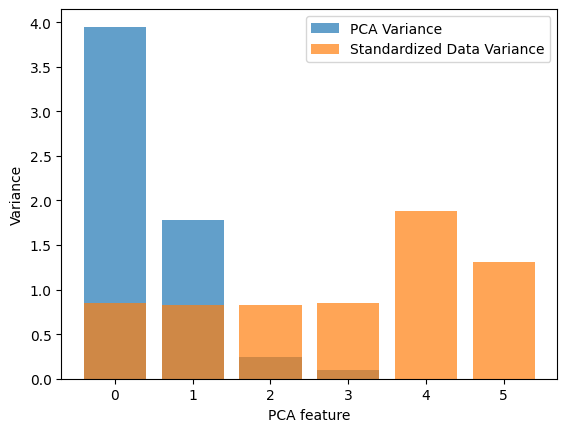

' variance of features 4 and 5, were huge and insignificant, as a result\n were reduced in the pca pipeline.   '

In [ ]:
## Compare PCA variance vs Data variance, of course after Standardising.


# Import necessary libraries
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt

# Assume 'samples' is your data

# Create scaler: scaler
scaler = StandardScaler()

# Create a PCA instance: pca
pca = PCA()

# Create pipeline: pipeline
pipeline = make_pipeline(scaler, pca)

# Fit the pipeline to 'samples'
pipeline.fit(samples)

# Standardize the data
scaler = MinMaxScaler()
#samples_standardized = scaler.transform(samples)

scaler=MinMaxScaler(feature_range=(0,4))
samples_standardized = scaler.fit_transform(samples )#.reshape(-1,1))

# Compute the variance of the standardized data
variance = samples_standardized.var(axis=0)
#variance = samples.var(axis=0)

# Plot the explained variances
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_.tolist(), label='PCA Variance', alpha=0.7)
plt.bar(features, variance, label='Standardized Data Variance', alpha=0.7)
plt.xlabel('PCA feature')
plt.ylabel('Variance')
plt.xticks(features)
plt.legend()
plt.show()


""" variance of features 4 and 5, were huge and insignificant, as a result
 were reduced in the pca pipeline.   """

Intrinsic dimension of the fish data
In the previous exercise, you plotted the variance of the PCA features of the fish measurements. Looking again at your plot, what do you think would be a reasonable choice for the "intrinsic dimension" of the fish measurements? Recall that the intrinsic dimension is the number of PCA features with significant variance.


Great job! Since PCA features 0 and 1 have significant variance, the intrinsic dimension of this dataset appears to be 2.

Note: Dimension reduction represent data using less features and vital for ML pipeline.

In [ ]:
## Dimens reduc of the fish data
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Assume 'samples' is your data with multiple columns

# Create a StandardScaler instance: scaler
scaler = StandardScaler()

# Fit and transform the scaler on your data
scaled_samples = scaler.fit_transform(samples)

# Create a PCA model with 2 components: pca
pca = PCA(n_components=2)

# Fit the PCA instance to the scaled samples
pca.fit(scaled_samples)

# Transform the scaled samples: pca_features
pca_features = pca.transform(scaled_samples)

# Print the shape of pca_features
print(pca_features.shape)

""" Superb! You've successfully reduced the dimensionality from 6 to 2.  """



(84, 2)


" Superb! You've successfully reduced the dimensionality from 6 to 2.  "

 A tf-idf word-frequency array
In this exercise, you'll create a tf-idf word frequency array for a toy collection of documents. For this, use the TfidfVectorizer from sklearn. It transforms a list of documents into a word frequency array, which it outputs as a csr_matrix. It has fit() and transform() methods like other sklearn objects.





documents
['cats say meow', 'dogs say woof', 'dogs chase cats']

In [ ]:
# Import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer



documents = ['cats say meow', 'dogs say woof', 'dogs chase cats']

# Create a TfidfVectorizer: tfidf
tfidf = TfidfVectorizer()

# Apply fit_transform to document: csr_mat
csr_mat = tfidf.fit_transform(documents)

# Print result of toarray() method
print(csr_mat.toarray())

# Get the words: words
#words = tfidf.get_feature_names()
words = tfidf.get_feature_names_out()

# Print words
print(words)

""" Great work! You'll now move to clustering Wikipedia articles! """



[[0.51785612 0.         0.         0.68091856 0.51785612 0.        ]
 [0.         0.         0.51785612 0.         0.51785612 0.68091856]
 [0.51785612 0.68091856 0.51785612 0.         0.         0.        ]]
['cats' 'chase' 'dogs' 'meow' 'say' 'woof']


" Great work! You'll now move to clustering Wikipedia articles! "

Clustering Wikipedia part

You saw in the video that TruncatedSVD is able to perform PCA on sparse arrays in csr_matrix format, such as word-frequency arrays. Combine your knowledge of TruncatedSVD and k-means to cluster some popular pages from Wikipedia. In this exercise, build the pipeline. In the next exercise, you'll apply it to the word-frequency array of some Wikipedia articles.

In [ ]:
# Perform the necessary imports:
from sklearn.decomposition import TruncatedSVD
from sklearn.cluster import KMeans
from sklearn.pipeline import make_pipeline
# Create a TruncatedSVD instance: svd
svd = TruncatedSVD(n_components = 50)

# Create a KMeans instance: kmeans
kmeans = KMeans(n_clusters = 6)

# Create a pipeline: pipeline
pipeline = make_pipeline(svd, kmeans)

""" Excellent! Now that you have set up your pipeline, you will use it
in the next exercise to cluster the articles. """


' Excellent! Now that you have set up your pipeline, you will use it\nin the next exercise to cluster the articles. '


Clustering Wikipedia part II

It is now time to put your pipeline from the previous exercise to work! You are given an array articles of tf-idf word-frequencies of some popular Wikipedia articles, and a list titles of their titles. Use your pipeline to cluster the Wikipedia articles.



In [ ]:
from google.colab import files
file = files.upload()
# Print uploaded files
print("Uploaded files:", file.keys())
#wiki = pd.read_csv('Wikipedia-vectors.csv')
file_name = 'wikipedia-vectors.csv'
wiki = pd.read_csv(file_name)

Saving wikipedia-vectors.csv to wikipedia-vectors.csv
Uploaded files: dict_keys(['wikipedia-vectors.csv'])


In [ ]:
file_name = 'wikipedia-vectors.csv'
wiki = pd.read_csv(file_name)

In [ ]:
wiki.head() #; wiki.info()
titles = pd.DataFrame( wiki.columns)[1:].values
titles.dtype


dtype('O')

In [ ]:
wiki_art = wiki.T
wiki_art = wiki_art.iloc[1:,1:]
#wiki_artt =  wiki_art.T.drop(wiki_art.columns[0], axis=1)
article = wiki_art

article.info()



<class 'pandas.core.frame.DataFrame'>
Index: 60 entries, HTTP 404 to Adam Levine
Columns: 13124 entries, 1 to 13124
dtypes: float64(13124)
memory usage: 6.0+ MB


In [ ]:
articles = article.values

In [ ]:


# Import pandas
import pandas as pd

# Fit the pipeline to articles
pipeline.fit(articles)

# Calculate the cluster labels: labels
labels = pipeline.predict(articles)

# Create a DataFrame aligning labels and titles: df
df = pd.DataFrame({'labels': labels, 'article': np.array(titles).ravel()})

# Display df sorted by cluster label
print(df.sort_values('labels'))


""" Fantastic! Take a look at the cluster labels and see if you can identify any patterns!  """


    labels                                        article
59       0                                    Adam Levine
57       0                          Red Hot Chili Peppers
56       0                                       Skrillex
55       0                                  Black Sabbath
54       0                                 Arctic Monkeys
53       0                                   Stevie Nicks
52       0                                     The Wanted
51       0                                     Nate Ruess
50       0                                   Chad Kroeger
58       0                                         Sepsis
40       1                                    Tonsillitis
41       1                                    Hepatitis B
42       1                                    Doxycycline
43       1                                       Leukemia
47       1                                          Fever
45       1                                    Hepatitis C
46       1    

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


' Fantastic! Take a look at the cluster labels and see if you can identify any patterns!  '

# **4 Discovering interpretable features.**


In this chapter, you'll learn about a dimension reduction technique called "Non-negative matrix factorization" ("NMF") that expresses samples as combinations of interpretable parts. For example, it expresses documents as combinations of topics, and images in terms of commonly occurring visual patterns. You'll also learn to use NMF to build recommender systems that can find you similar articles to read, or musical artists that match your listening history!

NMF applied to Wikipedia articles
In the video, you saw NMF applied to transform a toy word-frequency array. Now it's your turn to apply NMF, this time using the tf-idf word-frequency array of Wikipedia articles, given as a csr matrix articles. Here, fit the model and transform the articles. In the next exercise, you'll explore the result.

In [ ]:

## NMF applied to Wikipedia articles
""" In the video, you saw NMF applied to transform a toy word-frequency array.
Now it's your turn to apply NMF, this time using the tf-idf word-frequency array
of Wikipedia articles, given as a csr matrix articles. Here, fit the model
and transform the articles. In the next exercise, you'll explore the result. """

# Import NMF
from sklearn.decomposition import NMF

# Create an NMF instance: model
model = NMF(n_components = 6)

# Fit the model to articles
model.fit(articles)

# Transform the articles: nmf_features
nmf_features = model.transform(articles)
nmf_featuress = pd.DataFrame(nmf_features)

# Print the NMF features
print(nmf_featuress.round(2))

""" Fantastic - let's explore the meaning of these features in the next exercise!  """


       0     1     2     3     4     5
0   0.00  0.00  0.00  0.00  0.00  0.44
1   0.00  0.00  0.00  0.00  0.00  0.56
2   0.00  0.00  0.00  0.00  0.00  0.40
3   0.00  0.00  0.00  0.00  0.00  0.38
4   0.00  0.00  0.00  0.00  0.00  0.48
5   0.01  0.01  0.01  0.03  0.00  0.33
6   0.00  0.00  0.02  0.00  0.01  0.36
7   0.00  0.00  0.00  0.00  0.00  0.49
8   0.02  0.01  0.00  0.02  0.03  0.48
9   0.01  0.03  0.03  0.07  0.02  0.34
10  0.00  0.00  0.53  0.00  0.03  0.00
11  0.00  0.00  0.35  0.00  0.00  0.00
12  0.01  0.01  0.31  0.06  0.01  0.02
13  0.00  0.01  0.34  0.01  0.00  0.00
14  0.00  0.00  0.43  0.00  0.04  0.00
15  0.00  0.00  0.48  0.00  0.00  0.00
16  0.01  0.02  0.37  0.03  0.00  0.01
17  0.00  0.00  0.48  0.00  0.00  0.00
18  0.00  0.01  0.55  0.00  0.00  0.00
19  0.00  0.00  0.46  0.00  0.00  0.00
20  0.00  0.01  0.02  0.51  0.06  0.01
21  0.00  0.00  0.00  0.51  0.00  0.00
22  0.00  0.01  0.00  0.42  0.00  0.00
23  0.00  0.00  0.00  0.43  0.00  0.00
24  0.00  0.00  0.00  0.4

" Fantastic - let's explore the meaning of these features in the next exercise!  "

In [ ]:
# Import pandas
import pandas as pd

# Create a pandas DataFrame: df
df = pd.DataFrame(nmf_features, index = titles.flatten())



df.info()
df.head()


<class 'pandas.core.frame.DataFrame'>
Index: 60 entries, HTTP 404 to Adam Levine
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       60 non-null     float64
 1   1       60 non-null     float64
 2   2       60 non-null     float64
 3   3       60 non-null     float64
 4   4       60 non-null     float64
 5   5       60 non-null     float64
dtypes: float64(6)
memory usage: 3.3+ KB


,0,1,2,3,4,5
HTTP 404,0.000000,0.0,0.0,0.0,0.0,0.438522
Alexa Internet,0.000000,0.0,0.0,0.0,0.0,0.564115
Internet Explorer,0.003776,0.0,0.0,0.0,0.0,0.396888
HTTP cookie,0.000000,0.0,0.0,0.0,0.0,0.380055
Google Search,0.000000,0.0,0.0,0.0,0.0,0.483390


In [ ]:
# Print the row for 'Anne Hathaway'
print(df.loc['Anne Hathaway'])

# Print the row for 'Denzel Washington'
print(df.loc['Denzel Washington'])




""" Great work! Notice that for both actors, the NMF feature 3 has by far the
highest value. This means that both articles are reconstructed using mainly
the 3rd NMF component. In the next video, you'll see why: NMF components
represent topics (for instance, acting!).  """

0    0.003825
1    0.000000
2    0.000000
3    0.571845
4    0.000000
5    0.000000
Name: Anne Hathaway, dtype: float64
0    0.000000
1    0.005574
2    0.000000
3    0.419552
4    0.000000
5    0.000000
Name: Denzel Washington, dtype: float64


" Great work! Notice that for both actors, the NMF feature 3 has by far the \nhighest value. This means that both articles are reconstructed using mainly \nthe 3rd NMF component. In the next video, you'll see why: NMF components \nrepresent topics (for instance, acting!).  "

In [ ]:
print(pd.DataFrame(model.components_))

      0         1         2         3      4      5         6      \
0  0.001224  0.000000  0.001759  0.000138    0.0    0.0  0.002493   
1  0.000010  0.005695  0.000000  0.000002    0.0    0.0  0.000569   
2  0.000008  0.000000  0.000000  0.004716    0.0    0.0  0.000762   
3  0.000000  0.003077  0.000000  0.000618    0.0    0.0  0.002452   
4  0.000571  0.004941  0.000000  0.000000    0.0    0.0  0.000089   
5  0.000000  0.008787  0.000000  0.000185    0.0    0.0  0.008667   

          7         8         9      ...     13114  13115     13116     13117  \
0  3.020090e-07  0.000845  0.001204  ...  0.026085    0.0  0.008421  0.000000   
1  5.030862e-04  0.000000  0.000000  ...  0.008152    0.0  0.000000  0.001719   
2  1.613489e-05  0.000000  0.000000  ...  0.008775    0.0  0.000000  0.001324   
3  8.193401e-05  0.004012  0.000000  ...  0.012677    0.0  0.000000  0.000000   
4  4.278926e-05  0.000000  0.005213  ...  0.001818    0.0  0.000000  0.000017   
5  1.536579e-05  0.000000  0.0

NMF learns topics of documents
In the video, you learned when NMF is applied to documents, the components correspond to topics of documents, and the NMF features reconstruct the documents from the topics. Verify this for yourself for the NMF model that you built earlier using the Wikipedia articles. Previously, you saw that the 3rd NMF feature value was high for the articles about actors Anne Hathaway and Denzel Washington. In this exercise, identify the topic of the corresponding NMF component.

The NMF model you built earlier is available as model, while words is a list of the words that label the columns of the word-frequency array.

After you are done, take a moment to recognize the topic that the articles about Anne Hathaway and Denzel Washington have in common!

In [ ]:
from google.colab import files
file = files.upload()
# Print uploaded files
print("Uploaded files:", file.keys())
#wiki = pd.read_csv('Wikipedia-vocab-utf8.txt')



Saving wikipedia-vocab-utf8.txt to wikipedia-vocab-utf8 (2).txt
Uploaded files: dict_keys(['wikipedia-vocab-utf8 (2).txt'])


In [ ]:

file_name = 'wikipedia-vocab-utf8 (2).txt'
words = pd.read_csv(file_name)
words

,aaron
0,abandon
1,abandoned
2,abandoning
3,abandonment
4,abbas
...,...
13119,zimbabwe
13120,zinc
13121,zone
13122,zones


In [ ]:
## NMF Learn topics from document
# Import pandas
import pandas as pd

# Create a DataFrame: components_df
components_df = pd.DataFrame( model.components_, columns = words)

# Print the shape of the DataFrame
print(components_df.shape)

# Select row 3: component
component = components_df.iloc[3]

# Print result of nlargest
print(component.nlargest())

""" Great work! Take a moment to recognise the topics that the articles
about Anne Hathaway and Denzel Washington have in common! """




(6, 13124)
(film,)       0.632134
(award,)      0.254844
(starred,)    0.246946
(role,)       0.212884
(actress,)    0.187659
Name: 3, dtype: float64


' Great work! Take a moment to recognise the topics that the articles \nabout Anne Hathaway and Denzel Washington have in common! '

## Explore the LED digits dataset

In the following exercises, you'll use NMF to decompose grayscale images into their commonly occurring patterns. Firstly, explore the image dataset and see how it is encoded as an array. You are given 100 images as a 2D array samples, where each row represents a single 13x8 image. The images in your dataset are pictures of a LED digital display.

In [ ]:
# Import pyplot
from matplotlib import pyplot as plt

# Select the 0th row: digit
digit = samples[0,:]

# Print digit
print(digit)

# Reshape digit to a 13x8 array: bitmap
bitmap = digit.reshape(13,8)

# Print bitmap
print(bitmap)

# Use plt.imshow to display bitmap
plt.imshow(bitmap, cmap='gray', interpolation='nearest')
plt.colorbar()
plt.show()

""" Excellent job! You'll explore this dataset further in the next
exercise and see for yourself how NMF can learn the parts of images.  """


NMF learns the parts of images

Now use what you've learned about NMF to decompose the digits dataset. You are again given the digit images as a 2D array samples. This time, you are also provided with a function show_as_image() that displays the image encoded by any 1D array:

In [ ]:
def show_as_image(sample):
    bitmap = sample.reshape((13, 8))
    plt.figure()
    plt.imshow(bitmap, cmap='gray', interpolation='nearest')
    plt.colorbar()
    plt.show()

In [ ]:
# Import NMF
from sklearn.decomposition import NMF

# Create an NMF model: model
model = NMF(n_components = 7)

# Apply fit_transform to samples: features
features = model.fit_transform(samples)

# Call show_as_image on each component
for component in model.components_:
    show_as_image(component)

# Select the 0th row of features: digit_features
digit_features = features[0,:]

# Print digit_features
print(digit_features)


""" Great work! Take a moment to look through the plots and notice how
NMF has expressed the digit as a sum of the components!  """



PCA doesn't learn parts
Unlike NMF, PCA doesn't learn the parts of things. Its components do not correspond to topics (in the case of documents) or to parts of images, when trained on images. Verify this for yourself by inspecting the components of a PCA model fit to the dataset of LED digit images from the previous exercise. The images are available as a 2D array samples. Also available is a modified version of the show_as_image() function which colors a pixel red if the value is negative.

In [ ]:
# Import PCA
from sklearn.decomposition import PCA

# Create a PCA instance: model
model = PCA(n_components = 7)

# Apply fit_transform to samples: features
features = model.fit_transform(samples)

# Call show_as_image on each component
for component in model.components_:
    show_as_image(component)



""" Great work! Notice that the components of PCA do not represent
meaningful parts of images of LED digits!  """


Which articles are similar to 'Cristiano Ronaldo'?

In the video, you learned how to use NMF features and the cosine similarity to find similar articles. Apply this to your NMF model for popular Wikipedia articles, by finding the articles most similar to the article about the footballer Cristiano Ronaldo. The NMF features you obtained earlier are available as nmf_features, while titles is a list of the article titles.

In [ ]:
# Perform the necessary imports
import pandas as pd
from sklearn.preprocessing import normalize

# Normalize the NMF features: norm_features
norm_features = normalize(nmf_features)

# Create a DataFrame: df
df = pd.DataFrame(norm_features, index = titles)

# Select the row corresponding to 'Cristiano Ronaldo': article
article = df.loc['Cristiano Ronaldo']

# Compute the dot products: similarities
similarities = df.dot(article)

# Display those with the largest cosine similarity
print(similarities.nlargest())

""" Great work - although you may need to know a little about football
(or soccer, depending on where you're from!) to be able to evaluate for
yourself the quality of the computed similarities! """

Recommend musical artists part I
In this exercise and the next, you'll use what you've learned about NMF to recommend popular music artists! You are given a sparse array artists whose rows correspond to artists and whose columns correspond to users. The entries give the number of times each artist was listened to by each user.

In [ ]:
# Perform the necessary imports
from sklearn.decomposition import NMF
from sklearn.preprocessing import Normalizer, MaxAbsScaler
from sklearn.pipeline import make_pipeline

# Create a MaxAbsScaler: scaler
scaler = MaxAbsScaler()

# Create an NMF model: nmf
nmf = NMF(n_components = 20)

# Create a Normalizer: normalizer
normalizer = Normalizer()

# Create a pipeline: pipeline
pipeline = make_pipeline(scaler, nmf, normalizer)

# Apply fit_transform to artists: norm_features
norm_features = pipeline.fit_transform(artists)

""" Excellent work - now that you've computed the normalized NMF features,
you'll use them in the next exercise to recommend musical artists! """

Recommend musical artists part II

Suppose you were a big fan of Bruce Springsteen - which other musical artists might you like? Use your NMF features from the previous exercise and the cosine similarity to find similar musical artists. A solution to the previous exercise has been run, so norm_features is an array containing the normalized NMF features as rows. The names of the musical artists are available as the list artist_names.

In [ ]:

# Import pandas
import pandas as pd

# Create a DataFrame: df
df = pd.DataFrame(norm_features, index=artist_names)

# Select row of 'Bruce Springsteen': artist
artist = df.loc['Bruce Springsteen']

# Compute cosine similarities: similarities
similarities = df.dot(artist)

# Display those with highest cosine similarity
print(similarities.nlargest())

""" Well done, and congratulations on reaching the end of the course! """